In [1]:
#import neccessary packages
import pandas as pd
import numpy as np

In [2]:
#Import the Data
df15 = pd.read_csv('2015.csv')
df16 = pd.read_csv('2016.csv')
df17 = pd.read_csv('2017.csv')
df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')

In [3]:
#Make dataframes columns similar for merging
df15['Year'] = 2015
df16['Year'] = 2016

df17.rename(columns = {'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                       'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                       'Dystopia.Residual': 'Dystopia Residual'},
           inplace = True)

df17['Year'] = 2017

df18.rename(columns = {'Country or region': 'Country',
                       'Score': 'Happiness Score',
                       'GDP per capita': 'Economy (GDP per Capita)',
                       'Social support': 'Family',
                       'Healthy life expectancy': 'Health (Life Expectancy)',
                       'Freedom to make life choices': 'Freedom',
                       'Perceptions of corruption': 'Trust (Government Corruption)'},
           inplace = True)

df18['Year'] = 2018

df19.rename(columns = {'Country or region': 'Country',
                       'Score': 'Happiness Score',
                       'GDP per capita': 'Economy (GDP per Capita)',
                       'Social support': 'Family',
                       'Healthy life expectancy': 'Health (Life Expectancy)',
                       'Freedom to make life choices': 'Freedom',
                       'Perceptions of corruption': 'Trust (Government Corruption)'},
           inplace = True)
df19['Year'] = 2019

In [4]:
#Create function to add region to 2017-2019 dataframes
region = df15.set_index('Country').to_dict()['Region']
def find_region(df):    
    try:
        df['Region'] = region[df['Country']]
    except KeyError:
        df['Region'] = np.nan
    return df

In [5]:
#Create the Happiness Rank column
df18['Happiness Rank'] = df18['Happiness Score'].rank(ascending = False).astype('int32')
df19['Happiness Rank'] = df19['Happiness Score'].rank(ascending = False).astype('int32')
#Create Dystopia Residual column
df18['Dystopia Residual'] = df18['Happiness Score'] - (df18['Economy (GDP per Capita)'] + df18['Family'] + df18['Health (Life Expectancy)'] + df18['Freedom'] + df18['Trust (Government Corruption)'] + df18['Generosity'])
df19['Dystopia Residual'] = df19['Happiness Score'] - (df19['Economy (GDP per Capita)'] + df19['Family'] + df19['Health (Life Expectancy)'] + df19['Freedom'] + df19['Trust (Government Corruption)'] + df19['Generosity'])

In [6]:
#Apply functions to neccessary dataframes

df17 = df17.apply(find_region, axis = 1)
df18 = df18.apply(find_region, axis = 1)
df19 = df19.apply(find_region, axis = 1)

In [7]:
#Find out how many Regions are not in df15
print(df17.isna().sum())
#Not many missing, so we can manually fill these regions after the merge

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
Year                             0
Region                           6
dtype: int64


In [8]:
#Create one dataset
frames = [df15, df16, df17, df18, df19]
df_all = pd.concat(frames)
#Sort Values for easy viewing  
df_all.sort_values('Country', inplace = True)
#Reset the index
df_all.reset_index(inplace = True)
#Drop unneeded columns
df_all.drop(['index', 'Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Whisker.high', 'Whisker.low', 'Overall rank'], axis = 1, inplace = True)

In [9]:
#Number of missing values after combination
print(df_all.isna().sum())

Country                           0
Region                           19
Happiness Rank                    0
Happiness Score                   0
Economy (GDP per Capita)          0
Family                            0
Health (Life Expectancy)          0
Freedom                           0
Trust (Government Corruption)     1
Generosity                        0
Dystopia Residual                 1
Year                              0
dtype: int64


In [10]:
# Find out which countries are missing regions to manually enter
result = df_all[df_all['Region'].isnull()].index.tolist()
for val in result:
    countries = df_all.iloc[val]['Country']
    countries = countries.splitlines()
    addition = {key: None for key in countries}
    print(addition)

{'Belize': None}
{'Belize': None}
{'Gambia': None}
{'Hong Kong S.A.R., China': None}
{'Namibia': None}
{'Namibia': None}
{'Namibia': None}
{'North Macedonia': None}
{'Northern Cyprus': None}
{'Northern Cyprus': None}
{'Somalia': None}
{'Somalia': None}
{'Somalia': None}
{'South Sudan': None}
{'South Sudan': None}
{'South Sudan': None}
{'Taiwan Province of China': None}
{'Trinidad & Tobago': None}
{'Trinidad & Tobago': None}


In [11]:
#Get possible Regions
print(df_all['Region'].unique())

['Southern Asia' 'Central and Eastern Europe'
 'Middle East and Northern Africa' 'Sub-Saharan Africa'
 'Latin America and Caribbean' 'Australia and New Zealand'
 'Western Europe' nan 'Southeastern Asia' 'North America' 'Eastern Asia']


In [12]:
#Add Region to the listed countries
addition['Belize'] = 'Latin America and Caribbean'
addition['Gambia'] = 'Sub-Saharan Africa'
addition['Hong Kong S.A.R., China'] = 'Eastern Asia'
addition['Namibia'] = 'Sub-Saharan Africa'
addition['North Macedonia'] = 'Central and Eastern Europe'
addition['Northern Cyprus'] = 'Middle East and Northern Africa'
addition['Somalia'] = 'Sub-Saharan Africa'
addition['South Sudan'] = 'Sub-Saharan Africa'
addition['Taiwan Province of China'] = 'Eastern Asia'
addition['Trinidad & Tobago'] = 'Latin America and Caribbean'
addition['Puerto Rico'] = 'Latin America and Caribbean'
addition['Somaliland Region'] = 'Sub-Saharan Africa'

In [13]:
#Add additional regions to the region dictionary and re-run the find_region function
region = {**region, **addition}
df_all = df_all.apply(find_region, axis = 1)

In [14]:
#Look at the one NaN value
print(df_all[df_all['Trust (Government Corruption)'].isnull()].index.tolist())
print(df_all.iloc[732])

[732]
Country                                     United Arab Emirates
Region                           Middle East and Northern Africa
Happiness Rank                                                20
Happiness Score                                            6.774
Economy (GDP per Capita)                                   2.096
Family                                                     0.776
Health (Life Expectancy)                                    0.67
Freedom                                                    0.284
Trust (Government Corruption)                                NaN
Generosity                                                 0.186
Dystopia Residual                                            NaN
Year                                                        2018
Name: 732, dtype: object


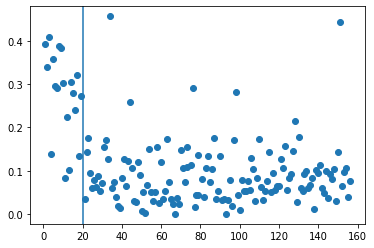

count    155.000000
mean       0.112000
std        0.096492
min        0.000000
25%        0.051000
50%        0.082000
75%        0.137000
max        0.457000
Name: Trust (Government Corruption), dtype: float64


In [17]:
#Find the method of replacement
import matplotlib.pyplot as plt
plt.scatter(x=df18['Happiness Rank'], y = df18['Trust (Government Corruption)'])
plt.axvline(x=20)
plt.show()
print(df18['Trust (Government Corruption)'].describe())

In [16]:
#Considering rank 20, the mean from the 2018 data seems to be the best replacement value
df_all['Trust (Government Corruption)'].fillna(value = df18['Trust (Government Corruption)'].mean(), inplace = True)
#Update the Dystopia Residual
df_all['Dystopia Residual'] = df_all['Happiness Score'] - (df_all['Economy (GDP per Capita)'] + df_all['Family'] + df_all['Health (Life Expectancy)'] + df_all['Freedom'] + df_all['Trust (Government Corruption)'] + df_all['Generosity'])

In [141]:
#Shuffle and Export the clean data
from sklearn.utils import shuffle
df_all = shuffle(df_all)
df_all.to_csv('data_clean.csv', index = False)